# Description

* Author: Seydou DIA & Simona MILADINOVA
* Creation date: 04-02-2022
* Last update : 04-02-2022<br>

This notebook is used to processed the data that is at our disposal.

In this notebook we process: 
* stock data
* carbon footprint data

# Setup

In [4]:
%matplotlib notebook
%load_ext autoreload


## Imports

In [5]:
# os related
from pathlib import Path
import os 

# data related
import pandas as pd
import missingno as msno
import datetime as dt
import numpy as np
import json

# visual related
import matplotlib.pyplot as plt
# time related

## Paths

In [6]:
PROJECT_PATH = Path(os.getcwd()).parent

In [32]:
RAW_DATA = PROJECT_PATH / "RAW_DATA" 
PROC_DATA = PROJECT_PATH / "PROC_DATA"


# RAW FILES
CSV_FILE = RAW_DATA / "Individual_stock_data_csv.csv"
XLSX_FILE = RAW_DATA / "Individual_stock_data.xlsx"

# PROC FILES
PROC_STOCK = PROC_DATA / "proc_stock.csv"
PROC_CARBON = PROC_DATA / "proc_carbon.csv"
PROC_SP = PROC_DATA / "proc_sp.csv"
STOCK_2000 = PROC_DATA / "stock_2000.csv"

STOCK_WORK = PROC_DATA / "stock_work.csv"
STOCK2USE = PROC_DATA / "stock2use.csv"
DIC2USE = PROC_DATA / "dic2use.json"


## Utils

In [5]:
from fonctions import *

# Notebook

## Stock data

In [10]:

df = pd.read_csv(CSV_FILE, sep=";")


In [11]:
df.rename(columns={"Unnamed: 0": "timestamp"}, inplace=True)

In [12]:
df["timestamp"] = df["timestamp"].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [13]:
df.set_index("timestamp", inplace=True)

In [14]:
df[["JEC", "BBT"]] = np.nan

In [15]:
for col in df.columns: 
    df[col] = df[col].apply(lambda x: str(x))
    df[col] = df[col].apply(lambda x: x.replace(",","."))
    df[col] = df[col].apply(lambda x: float(x))

In [16]:
df.columns = [col.lower() for col in df.columns]

In [16]:
if SAVE_DATA:
    df.to_csv(PROC_STOCK)

In [17]:
df = read_file(PROC_STOCK)

<IPython.core.display.Javascript object>


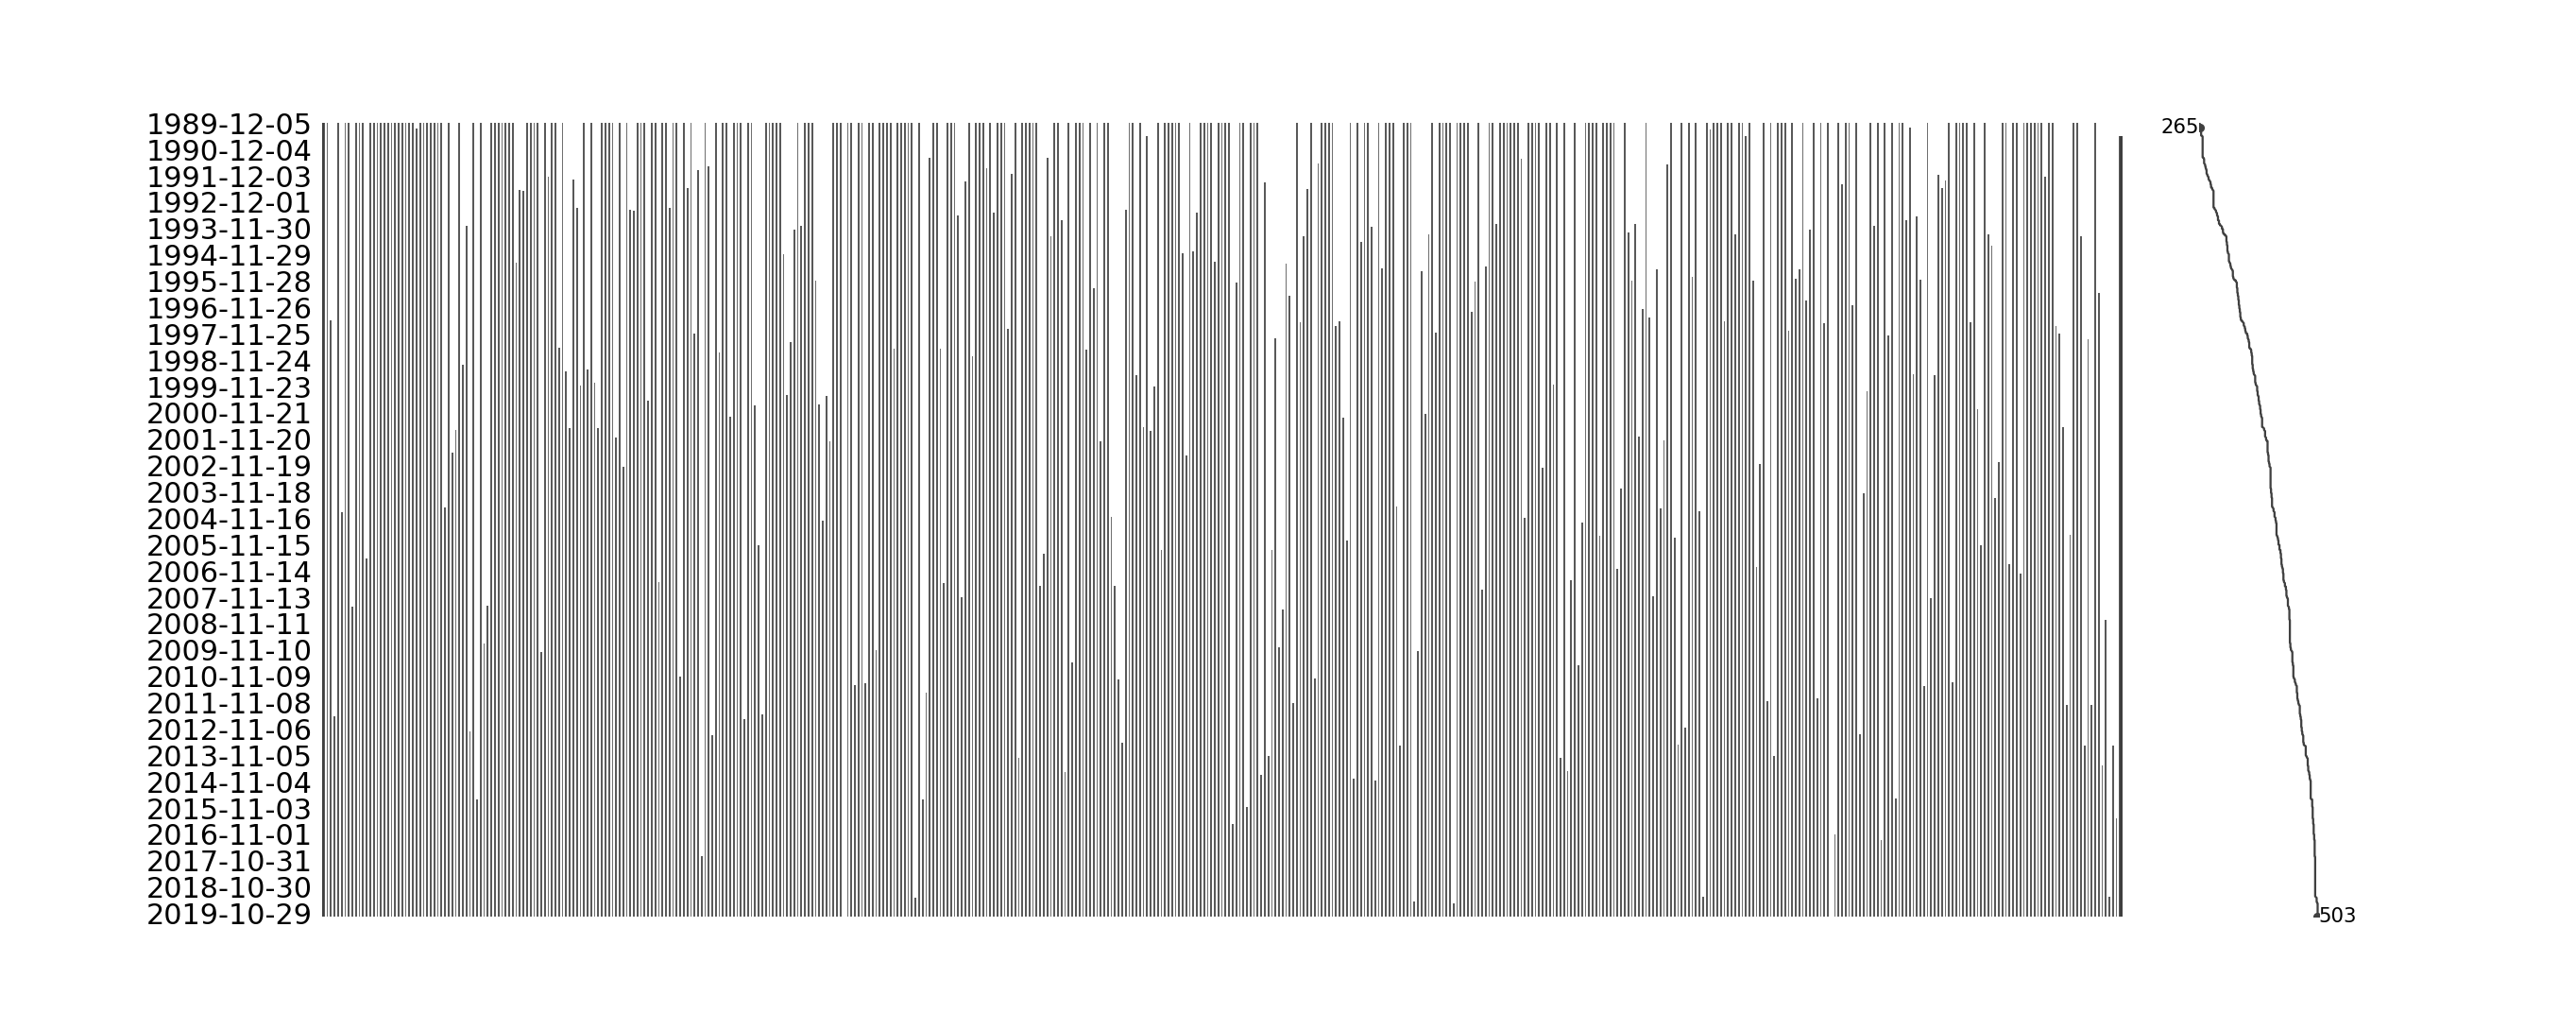

<AxesSubplot:>

In [18]:
msno.matrix(df, freq="364D")



* Seulement 265 titres avec des valeurs entre 1989 et 2019
* On propose de fixer un seuil de semaine manquante


In [19]:
len(df.index)

1567

In [20]:

seuil_mois = 20 
seuil_an = 11

# Retrieve number of Nan in each column
null_series = df.isnull().sum().sort_values(ascending=False)

# Set threshold at which we will use the data
use_col = null_series[null_series < seuil_an*52].index

In [21]:

missing_week = [len(null_series[null_series <= seuil]) for seuil in range(len(df))] 


In [22]:
start_date = dt.datetime(2000,1,1)


In [23]:
df_info = pd.DataFrame(index=df.index, data=missing_week, columns=["available_assets"])

<IPython.core.display.Javascript object>


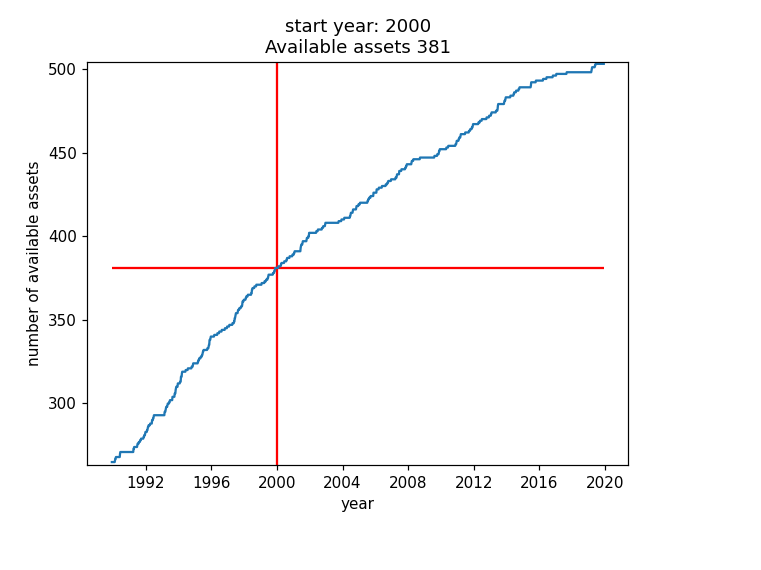

Text(0.5, 1.0, 'start year: 2000\nAvailable assets 381')

In [24]:
plt.figure()
plt.plot(df.index, missing_week)
plt.xlabel("year")
plt.ylabel("number of available assets")
plt.vlines(x=start_date, ymin=263,ymax=600, color="red")
plt.ylim(263,504)

threshold = df_info.loc[str(start_date.year)].values[0][0]

plt.hlines(threshold, xmin=df.index[0], xmax=df.index[-1], color="red")

plt.title(f"start year: {start_date.year}\nAvailable assets {threshold}")

In [48]:
# 2000 stock
df_2000 = df.loc[start_date:].dropna(axis=1)


In [75]:
# Here we put 1044 because we want to have a multiply of 12 rows to ease the computation of returns on a 3 months 
# period
df_work = df.iloc[-1044:].dropna(axis=1)

df_work.to_csv(STOCK_WORK)

## Footprint data

In [76]:
#df_carbon = pd.read_excel(XLSX_FILE, sheet_name="carbon footprint data")
#df_carbon = proc_df(df_carbon, index="company")
#df_carbon["company"] = df_carbon["company"].apply(lambda x: x.lower())
#df_carbon.set_index("company", inplace=True)
#df_carbon.to_csv(PROC_CARBON)

In [25]:
df_work = read_file(STOCK_WORK)

In [26]:
df_carbon = read_file(PROC_CARBON, index="company")

In [59]:
# fonction to select the carbon footprint of the data of selected stock prices

# Test

In [27]:
from fonctions import *

In [28]:
stock_df = read_file(STOCK_WORK)

In [29]:
df_carbon = read_file(PROC_CARBON, index="company")

In [30]:
final_df, out_dic = select_stock(stock_df, df_carbon)

In [33]:
final_df.to_csv(STOCK2USE)

In [ ]:
out_dic

In [36]:
json_string = json.dumps(out_dic)

with open(DIC2USE, 'w') as outfile:
    json.dump(json_string, outfile)